# Background

This kind of analysis are done by companies to determine the likelihood that a customer will churn. This way the company can develop different kind of strategies to diversify promotions to keep customers and also estimate a percentaje of churn which can a be a loss of income for the company. The following data set is from [kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) 

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory data analysis

### Questions

Does the gender affects on the descition to cancle the service?

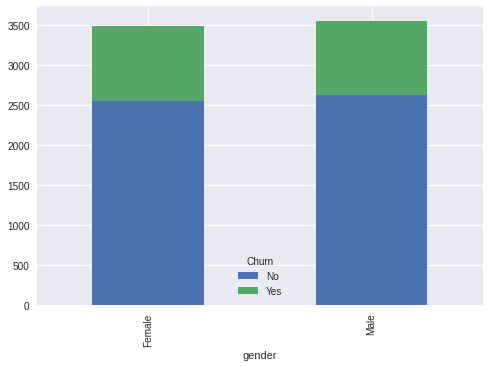

In [7]:
plt.style.use('seaborn')
plot = data.groupby(['gender','Churn']).size().reset_index().pivot(columns='Churn', index='gender', values=0)
plot.plot(kind='bar', stacked=True, )

We see no difference between genders when it comes to cancel the service

Senior Citizens tend to cancel more?

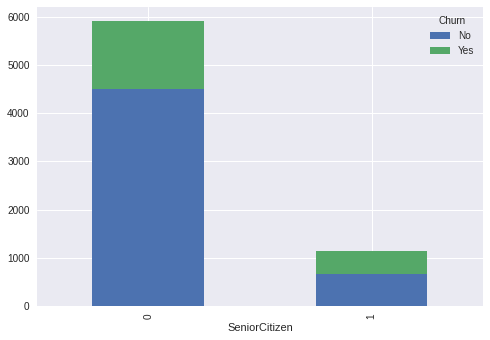

In [8]:
plot = data.groupby(['SeniorCitizen','Churn']).size().reset_index().pivot(columns='Churn', index='SeniorCitizen', values=0)
plot.plot(kind='bar', stacked=True)

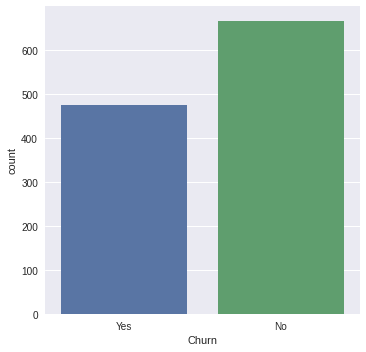

In [9]:
sns.catplot(x='Churn', kind='count',data=data[['SeniorCitizen','Churn']][data.SeniorCitizen == 1])

We can observe that although there are not many Seniors Citizens in the data set, a considerable part of them cancel their contracts. Let's make a deeper analysis here

<Figure size 720x720 with 0 Axes>

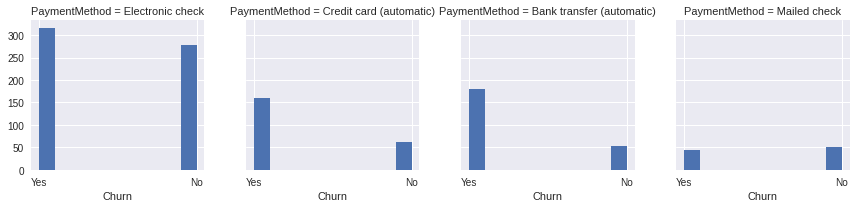

<Figure size 720x720 with 0 Axes>

In [10]:
g = sns.FacetGrid(data[data.SeniorCitizen ==1], col='PaymentMethod')
g = g.map(plt.hist, 'Churn')
plt.figure(figsize=(10,10))

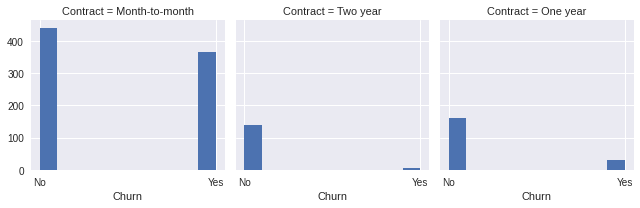

In [11]:
g = sns.FacetGrid(data[data.SeniorCitizen ==1], col='Contract')
g = g.map(plt.hist, 'Churn')

We can already start to think that the feature PaymentMethod and Contract are very powerful to this analysis

Let's see what happend with this two feature but with no Senior Citizens

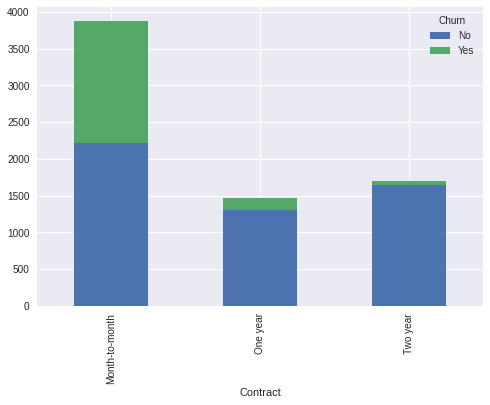

In [12]:
plot = data.groupby(['Contract','Churn']).size().reset_index().pivot(columns='Churn', index='Contract', values=0)
plot.plot(kind='bar', stacked=True)

Here is a huge finding, as we can see the most part of the churn is by month-to-month contract customers. This was one of my theories before analyzing the data and came up to be true.

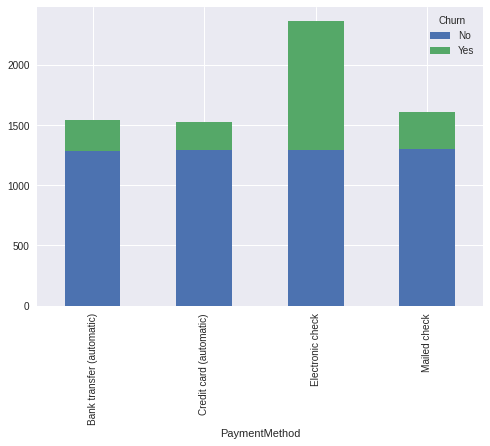

In [13]:
plot = data.groupby(['PaymentMethod','Churn']).size().reset_index().pivot(columns='Churn', index='PaymentMethod', values=0)
plot.plot(kind='bar', stacked=True)

Another interesting finding here, the electronic check payment method was the one with most considerable churn rate.

In [14]:
rates = pd.DataFrame([], columns=['Method', 'Positive Rate', 'Negative Rate'])

In [15]:
for method in data['PaymentMethod'].value_counts().index.tolist():
    negative_rate = data[data.PaymentMethod == method]['Churn'].value_counts()[0] / data['Churn'].shape[0]
    positive_rate = data[data.PaymentMethod == method]['Churn'].value_counts()[1] / data['Churn'].shape[0]
    rate = {'Method': method, 'Positive Rate': positive_rate, 'Negative Rate': negative_rate}
    rates = rates.append(pd.Series(rate), ignore_index=True)

In [16]:
rates

Method  Positive Rate  Negative Rate
0           Electronic check       0.152066       0.183729
1               Mailed check       0.043731       0.185148
2  Bank transfer (automatic)       0.036632       0.182593
3    Credit card (automatic)       0.032941       0.183161

Make a quick look to the positive rates of the other three, significantly lower than Electronic Check

Next we want to analyze the tenure which stands for how long the clients have been actively paying the service

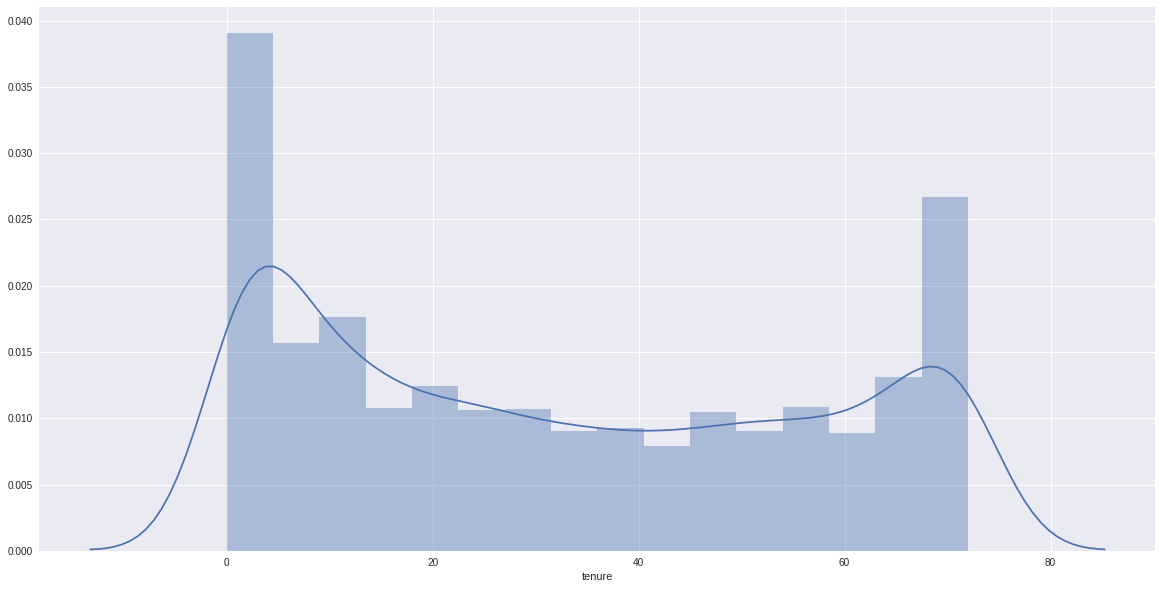

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(data['tenure'])

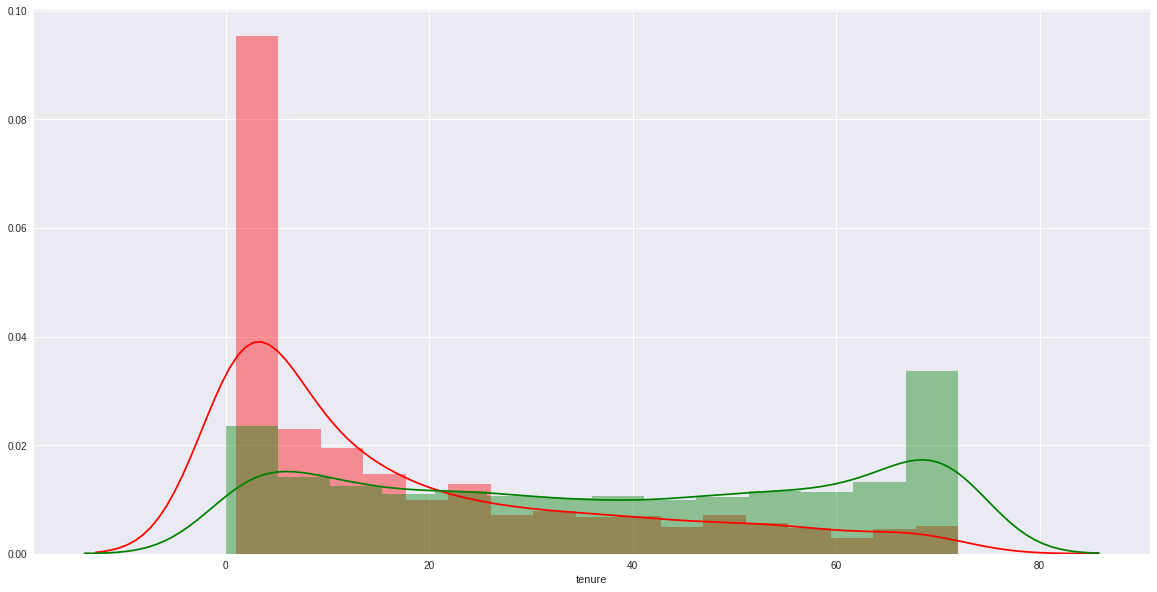

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(data['tenure'][data.Churn == 'Yes'], color='red')
sns.distplot(data['tenure'][data.Churn == 'No'], color='green')

An interesting observation here, the red ones showing the tenure of the clients that churned. And in green the ones that did not. We can see a large amount of clients who churned in the first months and the ones who are clients for more than a year maintaing the service.

Taking a look to the Dependents and Partners of the clients, we can see that people who has not a partner or dependents tend to have a greater churn rate. This could be because of the freedom of not being attached to anyone 

<Figure size 720x720 with 0 Axes>

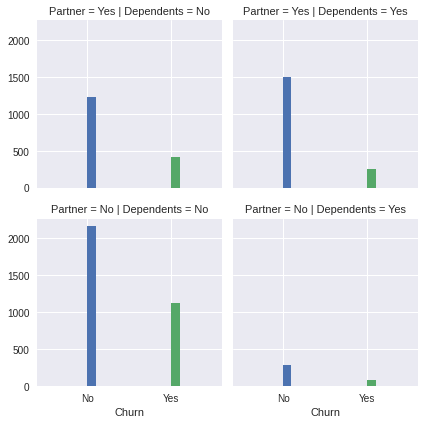

In [19]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data, col='Dependents', row='Partner', hue='Churn')
g = g.map(plt.hist, 'Churn')

Now another theory I had in mind was the fact that if the client is recieving a paper billing instead of a paperless it would have a greater churn rate but the following plot prove me wrong.

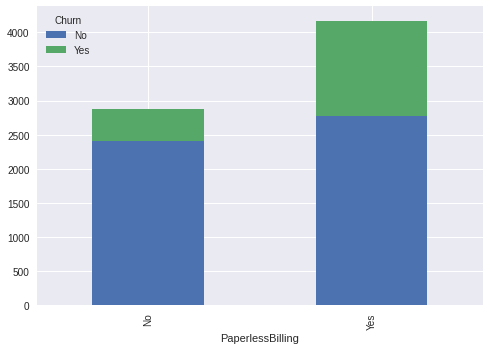

In [20]:
plot = data.groupby(['PaperlessBilling','Churn']).size().reset_index().pivot(columns='Churn', index='PaperlessBilling', values=0)
plot.plot(kind='bar', stacked=True)

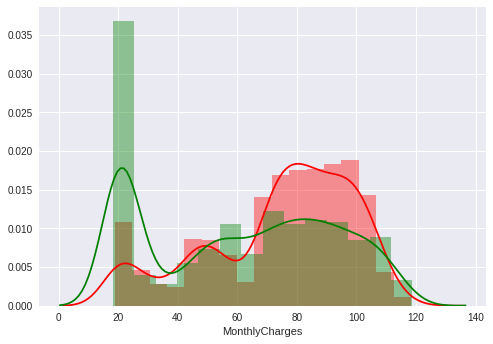

In [21]:
sns.distplot(data['MonthlyCharges'][data.Churn == 'Yes'], color= 'red')
sns.distplot(data['MonthlyCharges'][data.Churn == 'No'], color ='green')

Looking at the monthly charges of the clients we can see that at lower charges, lower the churn rate too but this could be biased because we are not counting how many services the client had contracted.

Now that our basic EDA has ended we are going to create a baseline model for all the features 

# Data Modeling

We need to map all our data since XGBoost and LightGBM need the features as number input. On the other hand Catboost do not need the features to be numbers.

In [22]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [23]:
def map_categorical_ft(data, features):
    map_features = []
    for feature in features:
        mapping = {}
        idx = data[feature].value_counts().index.tolist()
        for index,value in enumerate(idx):
            mapping.update({value: index})  
        data[feature+'_ctg'] = data[feature].map(mapping)
        map_features.append(feature+'_ctg')
    return map_features


In [24]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [25]:
cat_features = map_categorical_ft(data, cat_features)

features = cat_features + ['tenure','MonthlyCharges', 'TotalCharges']

In [26]:
data['TotalCharges'] = (data['tenure'] * data['MonthlyCharges'] ) - data['MonthlyCharges']

In [27]:
data['Churn'] = data['Churn'].map({'Yes': 1,
                                   'No': 0})

## Creating a baseline model

Since this is a classification problem, we are going to train three different algorithms and see the performance of each one. Catboost, XGBoost and LightGBM

### Importing all the models

In [28]:
from catboost import CatBoostClassifier
from catboost import Pool
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data['Churn'], 
                                                        test_size=0.1)

clfs = [CatBoostClassifier(task_type = 'GPU', devices = '0:1', verbose=False),
          xgb.XGBClassifier(),
          lgb.LGBMClassifier(),
          RandomForestClassifier()
         ]

for cls in clfs:
    cls.fit(X_train, y_train)
    

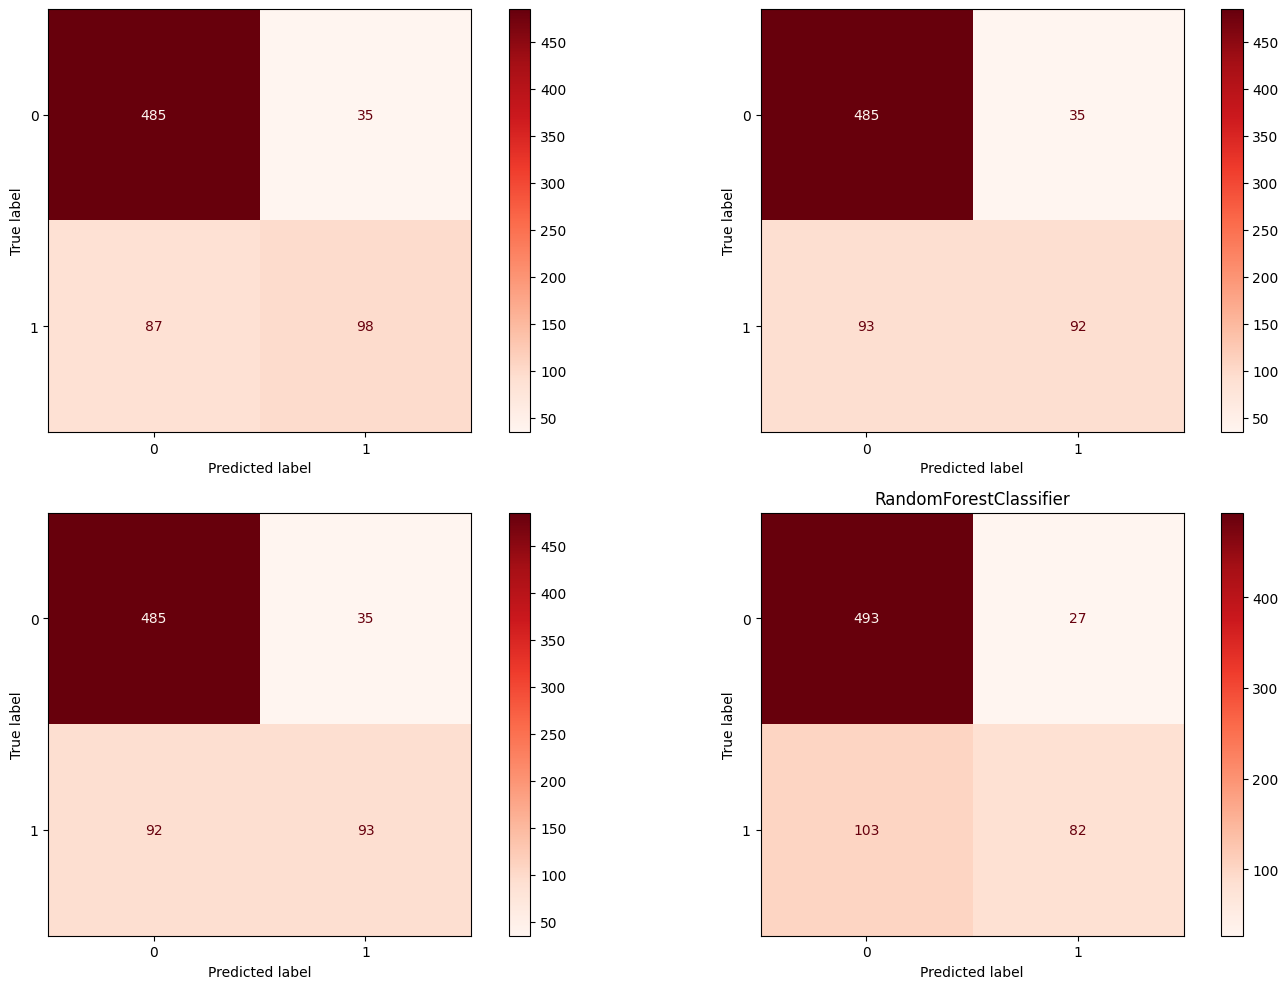

In [41]:
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix(clfs):
    plt.style.use('default')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

    for cls, ax in zip(clfs, axes.flatten()):
        plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Reds',
                         display_labels=data.Churn.value_counts().index.to_list())
    ax.title.set_text(type(cls).__name__)
    plt.tight_layout()  
    plt.show()

    
confusion_matrix(clfs)

In [31]:
from sklearn.metrics import accuracy_score, auc,roc_auc_score, recall_score, log_loss, roc_curve, f1_score,precision_score


def get_scores(clfs):
    
    metrics = pd.DataFrame([], columns=['Name','Accuracy','AUC Score','Precision','Recall','F1-Score','Logloss'])
    

    for cls in clfs:
        stats = {}
        prediction = cls.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, prediction, pos_label=1)
        stats.update({'Accuracy': accuracy_score(y_test, prediction),
                  'Name': type(cls).__name__ ,
                 'Recall' : recall_score(y_test, prediction),
                 'F1-Score': f1_score(y_test, prediction),
                 'AUC Score': roc_auc_score(y_test, prediction),
                 'Logloss': log_loss(y_test,prediction),
                 'Precision': precision_score(y_test,prediction)})
        metrics = metrics.append(stats, ignore_index=True)
    return metrics

metrics = get_scores(clfs)

In [32]:
metrics

Name  Accuracy  AUC Score  Precision    Recall  F1-Score  \
0      CatBoostClassifier  0.821277   0.722141   0.725191  0.513514  0.601266   
1           XGBClassifier  0.781560   0.691736   0.600000  0.502703  0.547059   
2          LGBMClassifier  0.809929   0.716190   0.680851  0.518919  0.588957   
3  RandomForestClassifier  0.775887   0.666996   0.600000  0.437838  0.506250   

    Logloss  
0  6.172929  
1  7.544711  
2  6.564868  
3  7.740666

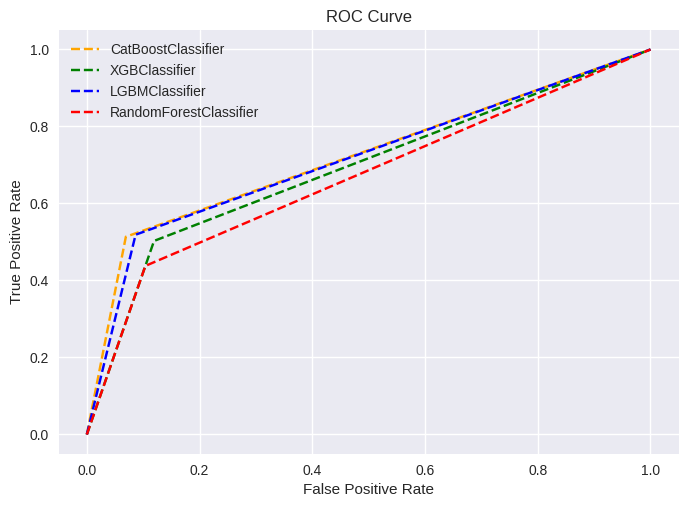

In [33]:
colors = ['orange','green','blue','red']


def plot_roc_curve(clfs, colors):
    
    plt.style.use('seaborn')
    for idx, cls in enumerate(clfs):
        prediction = cls.predict(X_test)
        fpr, tpr , threshold = roc_curve(y_test, prediction)
        plt.plot(fpr, tpr, linestyle='--', color=colors[idx],
                 label=type(cls).__name__)
    
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()
    
plot_roc_curve(clfs, colors)

### Correlation Matrix

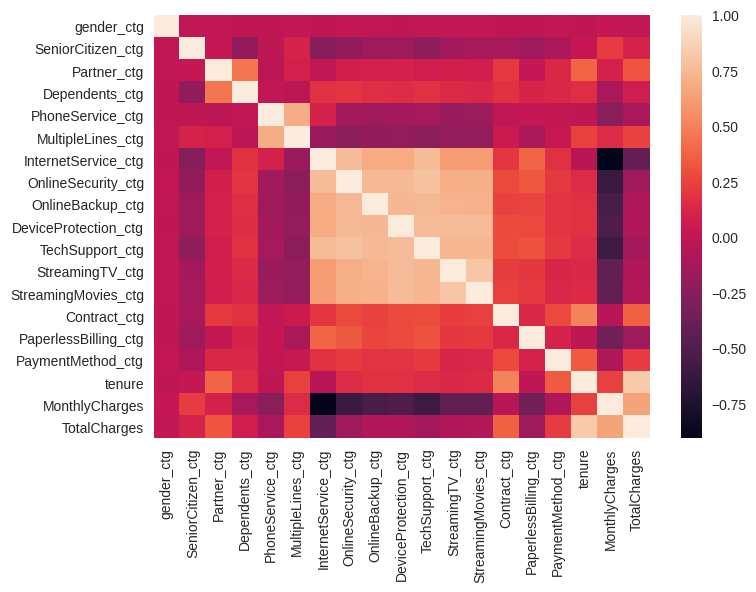

In [34]:
corrM = data[features].corr()

sns.heatmap(corrM, annot=False)

### Feature Importance with SHAP values

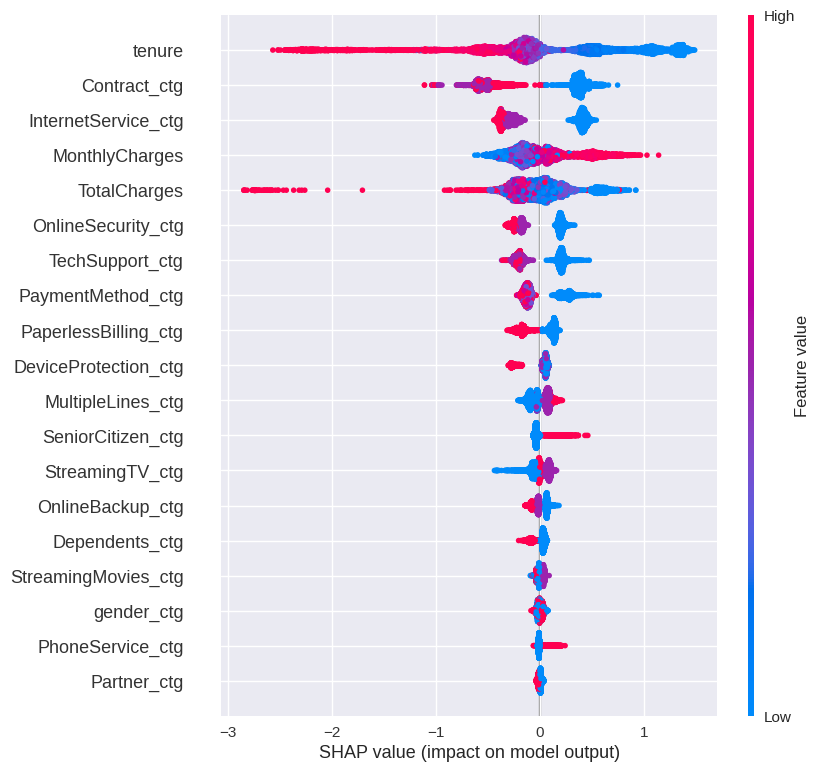

In [35]:
import shap

shap_values = clfs[0].get_feature_importance(Pool(X_train,y_train), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X_train)

### Grid Search

In [36]:
from sklearn.model_selection import GridSearchCV

cat_params = { 'learning_rate' : [0.01,0.02,0.05],
               'eval_metric' : ['AUC'],
               'depth': [1,3,5],
               'random_seed' : [1],
               'od_type' : ['Iter'],
               'od_wait' : [500],
               'grow_policy' : ['Lossguide'],
               'min_data_in_leaf' : [2,5,8,12,24,30],
               'max_leaves' : [24,32]
             }


xgb_params = { 'learning_rate' : [0.01,0.02,0.05],
               'eval_metric' : ['auc'],
               'grow_policy' : ['lossguide'],
               'max_depth' : [1,3,5],
               'max_leaves': [24,32],
               'subsample' : [0,1]
    
}

lgb_params = { 'learning_rate' : [0.01,0.02,0.05],
               'max_depth' : [1,3,5],
               'min_data_in_leaf' : [2,5,8,12,24,30]
}

rnd_params = { 'criterion': ['gini','entropy'],
               'max_depth' : [1,3,5],
               'min_samples_leaf' : [2,5,8,12,24,30]
    
}

param_grids = [cat_params,xgb_params,lgb_params,rnd_params]

In [37]:

clfs = [CatBoostClassifier(task_type = 'GPU', devices = '0:1', verbose=False),
          xgb.XGBClassifier(),
          lgb.LGBMClassifier(),
          RandomForestClassifier()
         ]

for idx,model in enumerate(clfs):
    gs = GridSearchCV(model, param_grid=param_grids[idx], cv=3, refit=True)
    gs.fit(X_train[features],y_train)
    prediction = gs.predict(X_test[features])
    clfs[idx] = gs.best_estimator_
     

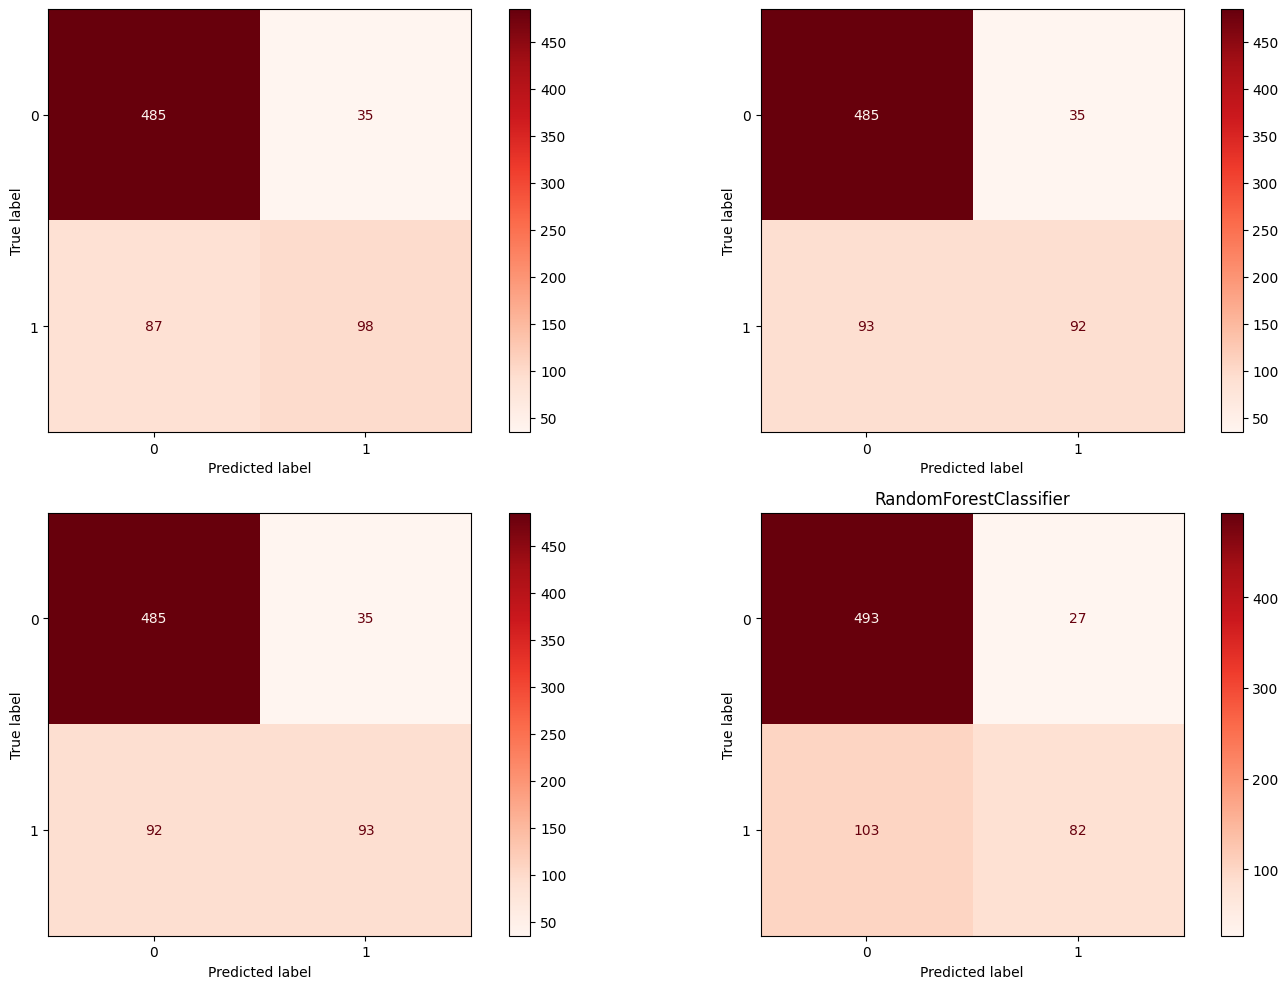

In [38]:
confusion_matrix(clfs)

In [44]:
type(clfs[0]).__name__

'CatBoostClassifier'

In [39]:
metrics_gs = get_scores(clfs)
metrics_gs

Name  Accuracy  AUC Score  Precision    Recall  F1-Score  \
0      CatBoostClassifier  0.826950   0.731211   0.736842  0.529730  0.616352   
1           XGBClassifier  0.818440   0.714995   0.724409  0.497297  0.589744   
2          LGBMClassifier  0.819858   0.717698   0.726562  0.502703  0.594249   
3  RandomForestClassifier  0.815603   0.695660   0.752294  0.443243  0.557823   

    Logloss  
0  5.976963  
1  6.270910  
2  6.221919  
3  6.368883

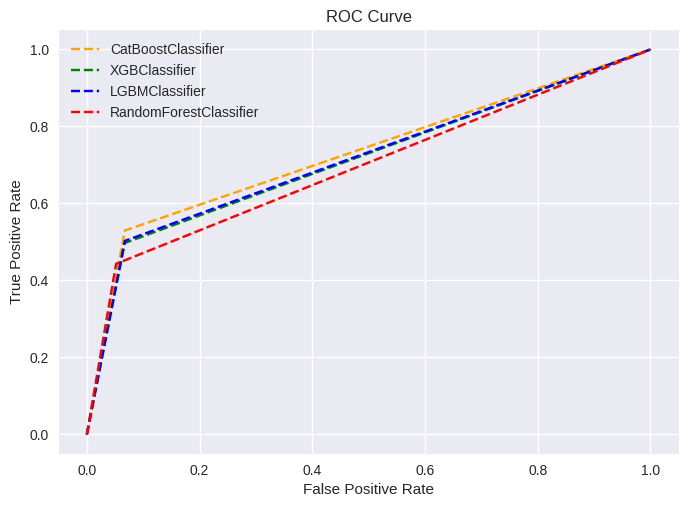

In [40]:
plot_roc_curve(clfs,colors)